# Evaluate AlphaBlooms Agents

This notebook evaluates the performance of AlphaBlooms agents in comparison to random, greedy, and human baselines.

## Imports

In [1]:
import sys
sys.path.append('..')

import numpy as np
import matplotlib.pyplot as plt

import Arena
from MCTS import MCTS
from utils import *

from blooms.BloomsGame import BloomsGame
from blooms.BloomsPlayers import RandomPlayer, GreedyPlayer
from blooms.pytorch.NNet import NNetWrapper as BloomsPyTorchNNet

## Evaluate Agent Against an Opponent

In [2]:
def evaluate_agent(n_games, game, opponent, chkpt_dir, chkpt_filename):
    """Compare the performance of an agent against an Opponent.
    """
    model = BloomsPyTorchNNet(game)
    model.load_checkpoint(chkpt_dir, chkpt_filename)
    args = dotdict({'numMCTSSims': 25, 'cpuct': 1.0})
    mcts = MCTS(game, model, args)
    agent = lambda x: np.argmax(mcts.getActionProb(x, temp=0))

    arena = Arena.Arena(agent, opponent, game)
    wins, losses, draws = arena.playGames(n_games, verbose=False)
    
    return wins, losses, draws

## Compare Performance Against a Random Agent

In [3]:
n_games = 10
game = BloomsGame(size=4, score_target=15)

random_agent = RandomPlayer(game).play

wins, losses, draws = evaluate_agent(n_games, game, random_agent, 'checkpoints_run_1/', 'checkpoint_2.pth.tar')
win_percentage = wins / n_games

Arena.playGames (2): 100%|██████████| 5/5 [00:34<00:00,  6.85s/it]


In [4]:
print(f'# wins:   {wins}')
print(f'# losses: {losses}')
print(f'# draws:  {draws}')
print()
print(f'Win percentage: {win_percentage * 100:.2f}%')

# wins:   4
# losses: 6
# draws:  0

Win percentage: 40.00%


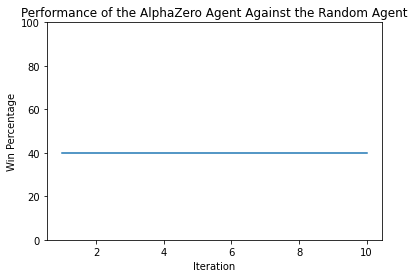

In [5]:
fig, ax = plt.subplots(1)

checkpoints = range(1, 11)
win_percentages = [win_percentage] * 10
win_percentages = [x * 100 for x in win_percentages]

plt.plot(checkpoints, win_percentages)

plt.xlabel('Iteration')
plt.ylabel('Win Percentage')
plt.ylim(0, 100)
plt.title('Performance of the AlphaZero Agent Against the Random Agent')
plt.show()

## Compare Performance Against a Greedy Agent

In [6]:
n_games = 10
game = BloomsGame(size=4, score_target=15)

greedy_agent = GreedyPlayer(game).play

wins, losses, draws = evaluate_agent(n_games, game, greedy_agent, 'checkpoints_run_1/', 'checkpoint_2.pth.tar')
win_percentage = wins / n_games

Arena.playGames (2): 100%|██████████| 5/5 [00:38<00:00,  7.73s/it]


In [7]:
print(f'# wins:   {wins}')
print(f'# losses: {losses}')
print(f'# draws:  {draws}')
print()
print(f'Win percentage: {win_percentage * 100:.2f}%')

# wins:   10
# losses: 0
# draws:  0

Win percentage: 100.00%


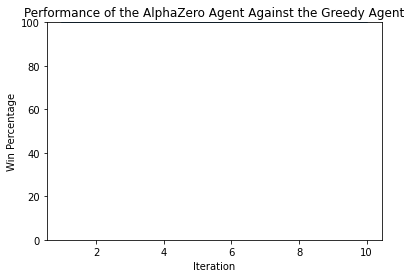

In [8]:
fig, ax = plt.subplots(1)

checkpoints = range(1, 11)
win_percentages = [win_percentage] * 10
win_percentages = [x * 100 for x in win_percentages]

plt.plot(checkpoints, win_percentages)

plt.xlabel('Iteration')
plt.ylabel('Win Percentage')
plt.ylim(0, 100)
plt.title('Performance of the AlphaZero Agent Against the Greedy Agent')
plt.show()